## Haberman's Survival Data

<h3>Relevant Information: </h3>

<p>The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.</p>


<h4>Number of Instances: 306</h4>

<h4>Number of Attributes: 4 (including the class attribute)</h4>

<h4>Attribute Information:</h4>
<ol>
    <li>Age of patient at time of operation (numerical)</li>
    <li>Patient's year of operation (year - 1900, numerical)</li>
    <li>Number of positive axillary nodes detected (numerical)</li>
    <li>Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year</li>
</ol>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.simplefilter('ignore')

In [5]:
cancer_data = pd.read_csv("haberman.csv",names=['age','op_year','no_pos_lymph_nodes','survival_status'])

In [3]:
cancer_data.head()

,age,op_year,no_pos_lymph_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
cancer_data.shape

(306, 4)

In [6]:
cancer_data.columns

Index(['age', 'op_year', 'no_pos_lymph_nodes', 'survival_status'], dtype='object')

In [7]:
cancer_data["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Univariate Analysis

In [6]:
cancer_survived = cancer_data.loc[cancer_data["survival_status"] == 1];
cancer_notsurvived = cancer_data.loc[cancer_data["survival_status"] == 2];

In [9]:
cancer_survived.shape

(225, 4)

In [10]:
cancer_notsurvived.shape

(81, 4)

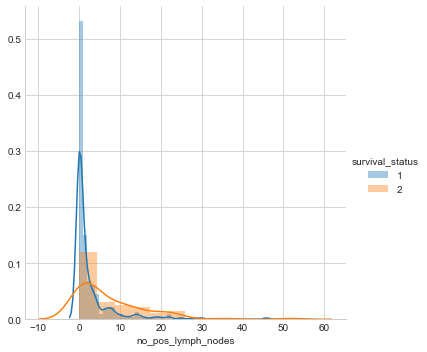

In [34]:
sns.FacetGrid(cancer_data, hue="survival_status", size=5)\
   .map(sns.distplot, "no_pos_lymph_nodes").add_legend();
plt.show();

### 2-D Scatter Plot
    

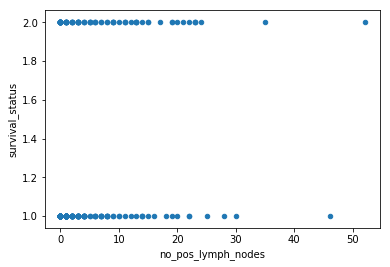

In [12]:
cancer_data.plot(kind="scatter",x="no_pos_lymph_nodes",y="survival_status")
plt.show()

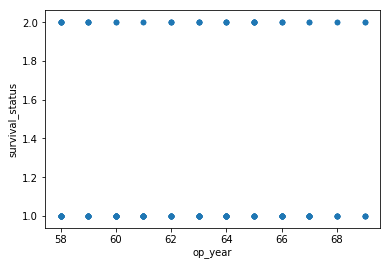

In [13]:
cancer_data.plot(kind="scatter",x="op_year",y="survival_status")
plt.show()

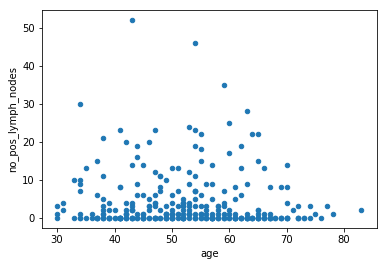

In [14]:
cancer_data.plot(kind="scatter",x="age",y="no_pos_lymph_nodes")
plt.show()

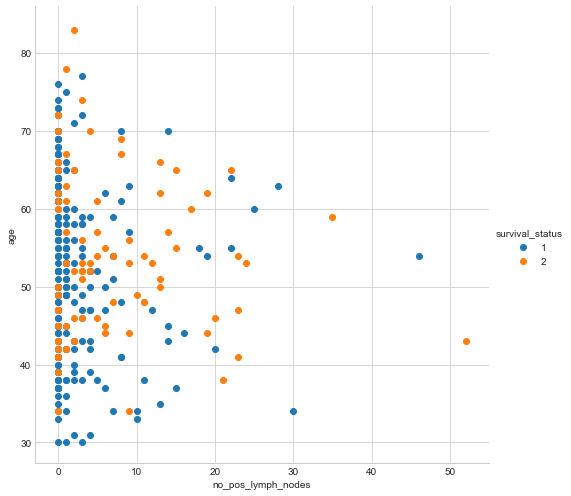

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_data, hue="survival_status", size=7) \
   .map(plt.scatter, "no_pos_lymph_nodes", "age") \
   .add_legend();
plt.show();

# 3D Plot

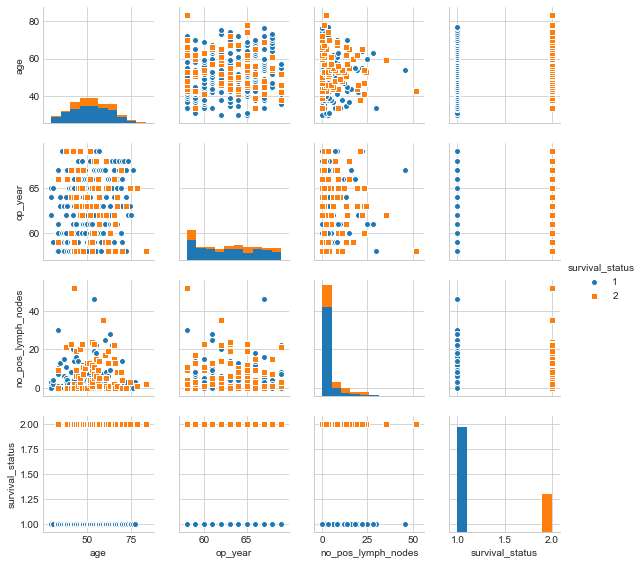

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
sns.set_style("whitegrid");
plt.figure()
sns.pairplot(cancer_data, hue = "survival_status", size=2, markers=["o", "s"])
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


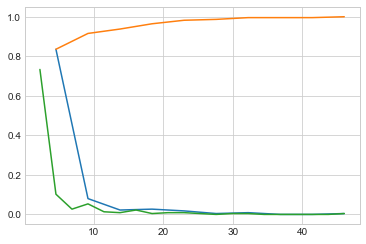

In [8]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(cancer_survived['no_pos_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(cancer_survived['no_pos_lymph_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


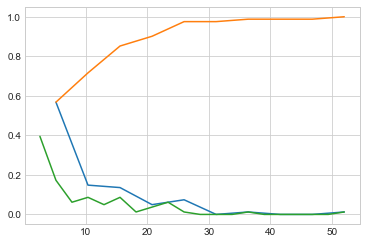

In [18]:

# Need for Cumulative Distribution Function (CDF) for not survived cancer

counts, bin_edges = np.histogram(cancer_notsurvived['no_pos_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(cancer_notsurvived['no_pos_lymph_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


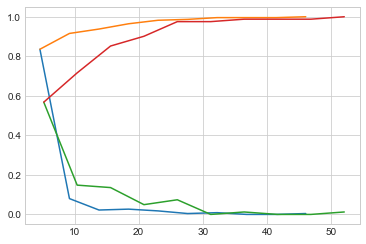

In [19]:
# Plots of CDF of positive lymph nodes for survived and not survived patients.

#cancer_survived
counts, bin_edges = np.histogram(cancer_survived['no_pos_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# patients who didnt survive cancer
counts, bin_edges = np.histogram(cancer_notsurvived['no_pos_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

In [20]:
#Mean, Variance, Std-deviation,  
print("Means: Positive axillary lymph nodes")
print("Mean of total Data:",np.mean(cancer_data['no_pos_lymph_nodes']))

#Mean with an outlier.
print("Cancer Survived with an outlier:",np.mean(np.append(cancer_survived['no_pos_lymph_nodes'],500)));
print("Cancer Not Survived",np.mean(np.append(cancer_notsurvived['no_pos_lymph_nodes'],500)));


print("\nStd-dev:");
print("Cancer Survived",np.std(cancer_survived['no_pos_lymph_nodes']))
print("Cancer Not Survived",np.std(cancer_notsurvived['no_pos_lymph_nodes']))



Means: Positive axillary lymph nodes
Mean of total Data: 4.026143790849673
Cancer Survived with an outlier: 4.991150442477876
Cancer Not Survived 13.463414634146341

Std-dev:
Cancer Survived 5.857258449412131
Cancer Not Survived 9.128776076761632


# IQR, Median Absolute Deviation-MAD

In [21]:

print("\nMedians:")
print("total Data:",np.median(cancer_data['no_pos_lymph_nodes']))
#Median with an outlier
print("Cancer Survived",np.median(np.append(cancer_survived['no_pos_lymph_nodes'],50)));
print("Cancer Not Survived",np.median(np.append(cancer_notsurvived['no_pos_lymph_nodes'],50)));

print("\nQuantiles:")
print("Cancer Survived",np.percentile(cancer_survived['no_pos_lymph_nodes'],np.arange(0, 100, 25)))
print("Cancer Not Survived",np.percentile(cancer_notsurvived['no_pos_lymph_nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("Cancer Survived",np.percentile(cancer_survived['no_pos_lymph_nodes'],90))
print("Cancer Not Survived",np.percentile(cancer_notsurvived['no_pos_lymph_nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Cancer Survived",robust.mad(cancer_survived['no_pos_lymph_nodes']))
print("Cancer Not Survived",robust.mad(cancer_notsurvived['no_pos_lymph_nodes']))



Medians:
total Data: 1.0
Cancer Survived 0.0
Cancer Not Survived 4.0

Quantiles:
Cancer Survived [0. 0. 0. 3.]
Cancer Not Survived [ 0.  1.  4. 11.]

90th Percentiles:
Cancer Survived 8.0
Cancer Not Survived 20.0

Median Absolute Deviation
Cancer Survived 0.0
Cancer Not Survived 5.930408874022408


## Box plot and Whiskers

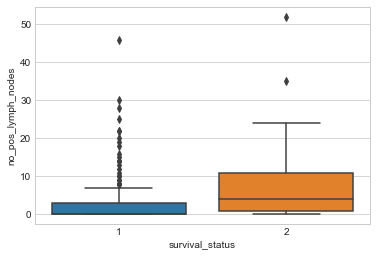

In [35]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='survival_status',y='no_pos_lymph_nodes', data=cancer_data)
plt.show()

## Violin plots

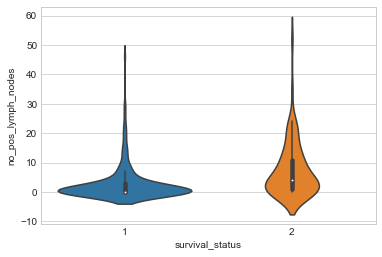

In [36]:
'''
A violin plot combines the benefits of the previous two plots 
and simplifies them
Denser regions of the data are fatter, and sparser ones thinner 
in a violin plot
'''
sns.violinplot(x="survival_status", y="no_pos_lymph_nodes", data=cancer_data, size=8)
plt.show()

In [28]:
from scipy import stats

stats.ks_2samp(cancer_survived.iloc[:,1], cancer_notsurvived.iloc[:,1])

Ks_2sampResult(statistic=0.07259259259259257, pvalue=0.9013727258134205)

In [29]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.14500079107181663, pvalue=0.9845330993574652)

In [30]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.051529621636675654, pvalue=0.9533100423342338)

In [31]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=0.07833711483561479, pvalue=8.748431461480521e-06)

# Observations

1. After  anlaysing through various plots It can be infered that greater the number of positive auxiallary lumph nodes found lesser the chance of survival.
  * Age is not a impacting factor as even many older people have survived those who had less number of positive lumph nodes.
  * Operation year also dosent have weight on the outcome. As medical advancement were slow during those years.
2. From Kolmogorov-Smirnov statistic on survived and not servived data:
  *  we can not reject the hypothesis as pvalue is 90%+ which is high and statistic value is low thats 7% around.

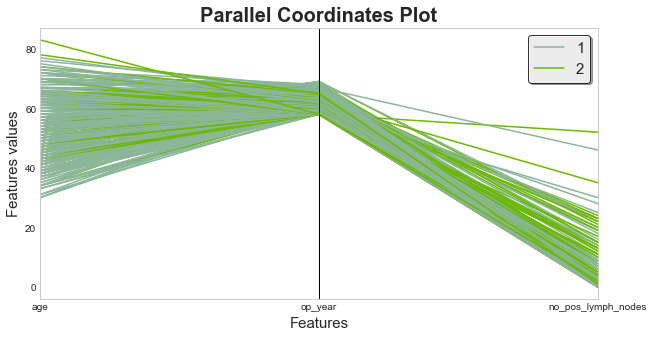

In [10]:

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
parallel_coordinates(cancer_data, "survival_status")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


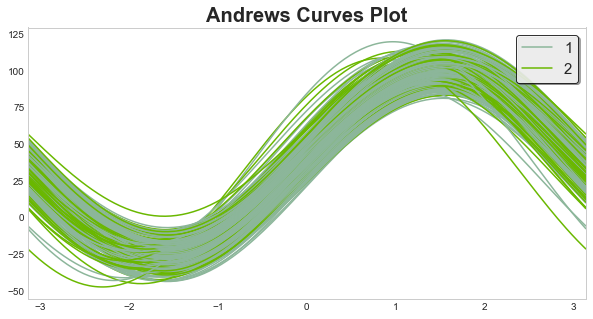

In [9]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(10,5))
andrews_curves(cancer_data, "survival_status")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()